In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from numpy import mean
from matplotlib import pyplot
from scipy.spatial.distance import euclidean
from sklearn.ensemble import RandomForestClassifier
from ds_utils.unsupervised import plot_loss_vs_cluster_number
from imblearn.pipeline import Pipeline
import matplotlib as mpl
from cycler import cycler
from sklearn.model_selection import ShuffleSplit
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('Loan_data.csv')

C:\Users\asus\AppData\Local\Temp\ipykernel_12244\140937924.py:1: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Loan_data.csv')


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(42536, 151)

In [5]:
#Dane zawierają 42536 obserwacji i 151 kolumn - łącznie z kolumną ze statusem pożyczki (zmienna objaśniana)

In [6]:
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [8]:
df.keys()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [9]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.137875,49.905875,1.200000
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.373774,15.563690,4.085255
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842.750000,40.000000,0.000000
50%,NaN,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701.100000,60.652500,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000


In [10]:
#Importuję opis zmiennych 
df_description = pd.read_csv('LCDataDictionary.csv')

In [11]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 151)
pd.set_option('display.max_colwidth', 2000)
pd.set_option('max_colwidth', 2000)
pd.options.display.float_format = '{:.3f}'.format

In [12]:
df_description[['LoanStatNew', 'Description']]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


### Sprawdzam brakujące wartości

In [13]:
df.isna().sum()

id                                                0
member_id                                     42536
loan_amnt                                         1
funded_amnt                                       1
funded_amnt_inv                                   1
term                                              1
int_rate                                          1
installment                                       1
grade                                             1
sub_grade                                         1
emp_title                                      2627
emp_length                                     1113
home_ownership                                    1
annual_inc                                        5
verification_status                               1
issue_d                                           1
loan_status                                       1
pymnt_plan                                        1
url                                               1
desc        

In [14]:
#Sprawdzam i usuwam kolumny w 100% z nan

In [15]:
nan_cols = [i for i in df.columns if df[i].isnull().all()]

In [16]:
nan_cols

['member_id',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_li

In [17]:
df.drop(
['member_id',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount'], 
axis=1, inplace=True)

In [18]:
#Usuwam kolumny, które zawierają nan w 85% 

In [19]:
nan_cols85 = [i for i in df.columns if df[i].isnull().sum() > 0.85*len(df)]

In [20]:
nan_cols85

['mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [21]:
df.drop(
['mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term'],
axis=1, inplace=True)

In [22]:
#Usunięcie kolumn ze zbędnymi informacjami

In [23]:
df.drop(
['url', 
 'id', 
 'zip_code', 
 'addr_state', 
 'title',
 'last_pymnt_amnt',
 'last_pymnt_d', 
 'last_credit_pull_d',
 'emp_title',
 'disbursement_method',
 'recoveries',
 'collection_recovery_fee',
 'sub_grade',
 'revol_bal',
 'revol_util',
 'funded_amnt_inv'],
axis=1, inplace=True)

In [24]:
#Usunięcie kolumn, które zawierają informacje z przyszłości, niedostępne w momencie udzielania pożyczki

In [25]:
df.drop(
['delinq_2yrs', 
 'mths_since_last_delinq', 
 'delinq_amnt', 
 'hardship_flag', 
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'debt_settlement_flag',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'last_fico_range_high',
 'last_fico_range_low'],
axis=1, inplace=True)

In [26]:
# Sprawdzam, które kolumny przyjmują tylko jedną wartość. Sprawdzam też, czy zawierają NaNy (duża ilość brakujących wartości 
# może oznaczać, że mogą one dać jakąś informację - wprowadzając dane ktoś nie wpisywał jakiejś wartości, ale zostawiał puste miejsca)

In [27]:
df['application_type'].value_counts()

Individual    42535
Name: application_type, dtype: int64

In [28]:
df['application_type'].isnull().sum()

1

In [29]:
df.drop(
['application_type'],
axis=1, inplace=True)

In [30]:
df['pymnt_plan'].value_counts()

n    42535
Name: pymnt_plan, dtype: int64

In [31]:
df['pymnt_plan'].isnull().sum()

1

In [32]:
df.drop(
['pymnt_plan'],
axis=1, inplace=True)

In [33]:
df['initial_list_status'].value_counts()

f    42535
Name: initial_list_status, dtype: int64

In [34]:
df['initial_list_status'].isnull().sum()

1

In [35]:
df.drop(
['initial_list_status'],
axis=1, inplace=True)

In [36]:
df['out_prncp'].value_counts()

0.000    42535
Name: out_prncp, dtype: int64

In [37]:
df['out_prncp'].isnull().sum()

1

In [38]:
df.drop(
['out_prncp'],
axis=1, inplace=True)

In [39]:
df['out_prncp_inv'].value_counts()

0.000    42535
Name: out_prncp_inv, dtype: int64

In [40]:
df['out_prncp_inv'].isnull().sum()

1

In [41]:
df.drop(
['out_prncp_inv'],
axis=1, inplace=True)

In [42]:
df['policy_code'].value_counts()

1.000    42535
Name: policy_code, dtype: int64

In [43]:
df['policy_code'].isnull().sum()

1

In [44]:
df.drop(
['policy_code'],
axis=1, inplace=True)

In [45]:
df['collections_12_mths_ex_med'].value_counts()

0.000    42390
Name: collections_12_mths_ex_med, dtype: int64

In [46]:
df['collections_12_mths_ex_med'].isnull().sum()

146

In [47]:
df.drop(
['collections_12_mths_ex_med'],
axis=1, inplace=True)

In [48]:
df['tax_liens'].value_counts()

0.000    42429
1.000        1
Name: tax_liens, dtype: int64

In [49]:
df['tax_liens'].isnull().sum()

106

In [50]:
df.drop(
['tax_liens'],
axis=1, inplace=True)

In [51]:
df.drop_duplicates(inplace= True)

In [52]:
df.shape

(42536, 23)

In [53]:
#Decuję też usunąć kolumnę 'desc' - w większości powiela ona dane z kolumny 'purpose'
df.drop(['desc'], axis=1, inplace=True)

In [54]:
df.shape

(42536, 22)

### Przekształcenie wartości w kolumnach - usunięcie procentów, dodatkowych znaków, itd

In [55]:
def usuniecie_miesiecy(df, column):
    df[column] = pd.to_numeric(df[column].str.replace('months', ''))

In [56]:
usuniecie_miesiecy(df, 'term')

In [57]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000.000,5000.000,36.000,10.65%,162.870,B,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,credit_card,27.650,Jan-1985,735.000,739.000,1.000,3.000,0.000,9.000,0.000
1,2500.000,2500.000,60.000,15.27%,59.830,C,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,car,1.000,Apr-1999,740.000,744.000,5.000,3.000,0.000,4.000,0.000
2,2400.000,2400.000,36.000,15.96%,84.330,C,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,small_business,8.720,Nov-2001,735.000,739.000,2.000,2.000,0.000,10.000,0.000
3,10000.000,10000.000,36.000,13.49%,339.310,C,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,other,20.000,Feb-1996,690.000,694.000,1.000,10.000,0.000,37.000,0.000
4,3000.000,3000.000,60.000,12.69%,67.790,B,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,other,17.940,Jan-1996,695.000,699.000,0.000,15.000,0.000,38.000,0.000


In [58]:
#przekształcenie procentow

In [59]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0

In [60]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000.000,5000.000,36.000,0.106,162.870,B,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,credit_card,27.650,Jan-1985,735.000,739.000,1.000,3.000,0.000,9.000,0.000
1,2500.000,2500.000,60.000,0.153,59.830,C,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,car,1.000,Apr-1999,740.000,744.000,5.000,3.000,0.000,4.000,0.000
2,2400.000,2400.000,36.000,0.160,84.330,C,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,small_business,8.720,Nov-2001,735.000,739.000,2.000,2.000,0.000,10.000,0.000
3,10000.000,10000.000,36.000,0.135,339.310,C,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,other,20.000,Feb-1996,690.000,694.000,1.000,10.000,0.000,37.000,0.000
4,3000.000,3000.000,60.000,0.127,67.790,B,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,other,17.940,Jan-1996,695.000,699.000,0.000,15.000,0.000,38.000,0.000


In [61]:
#wartości związane z datą

In [62]:
df['earliest_cr_line'].value_counts()

Oct-1999    393
Nov-1998    390
Oct-2000    370
Dec-1998    366
Dec-1997    348
           ... 
Jul-1964      1
Mar-1963      1
Nov-1965      1
Apr-1966      1
Nov-1959      1
Name: earliest_cr_line, Length: 530, dtype: int64

In [63]:
df['earliest_cr_line'].dtypes

dtype('O')

In [64]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')

In [65]:
df['earliest_cr_line'].value_counts()

1999-10-01    393
1998-11-01    390
2000-10-01    370
1998-12-01    366
1997-12-01    348
             ... 
1964-07-01      1
1963-03-01      1
1965-11-01      1
1966-04-01      1
1959-11-01      1
Name: earliest_cr_line, Length: 530, dtype: int64

In [66]:
df['earliest_cr_line'].dtypes

dtype('<M8[ns]')

### BRAKUJĄCE WARTOŚCI

In [67]:
df.isna().sum()

loan_amnt                  1
funded_amnt                1
term                       1
int_rate                   1
installment                1
grade                      1
emp_length              1113
home_ownership             1
annual_inc                 5
verification_status        1
issue_d                    1
loan_status                1
purpose                    1
dti                        1
earliest_cr_line          30
fico_range_low             1
fico_range_high            1
inq_last_6mths            30
open_acc                  30
pub_rec                   30
total_acc                 30
pub_rec_bankruptcies    1366
dtype: int64

In [68]:
## Brakujące dane
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
pub_rec_bankruptcies,1366,0.032
emp_length,1113,0.026
total_acc,30,0.001
pub_rec,30,0.001
open_acc,30,0.001
inq_last_6mths,30,0.001
earliest_cr_line,30,0.001
annual_inc,5,0.000
purpose,1,0.000
fico_range_high,1,0.000


In [69]:
#Uzupełniam brakujące wartości - na podstawie histogramu decyduję, czy uzupełniam medianą, czy najczęściej występującą wartością

In [70]:
# Dane kategoryczne

# Będę je uzupełniać najczęściej występującą wartością
# Najczęściej występującą wartość 'term' to 36
# Najczęściej występującą wartość 'grade' to B
# Najczęściej występującą wartość 'home_ownership' to 'RENT'
# Najczęściej występującą wartość 'purpose' to debt_consolidation'

In [71]:
#term
df['term'].value_counts()

36.000    31534
60.000    11001
Name: term, dtype: int64

In [72]:
df['term'].fillna(36.0, inplace=True)

In [73]:
#grade 
df['grade'].value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [74]:
df['grade'].fillna('B', inplace=True)

In [75]:
#home_ownership
df['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [76]:
df['home_ownership'].fillna('RENT', inplace=True)

In [77]:
#purpose
df['purpose'].value_counts()

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

In [78]:
df['purpose'].fillna('debt_consolidation', inplace=True)

In [79]:
df['loan_status'].fillna('Fully Paid', inplace=True)

In [80]:
# Dane numeryczne
# Będę je uzupełniać medianą

In [81]:
#loan_amnt
df['loan_amnt'].fillna(df['loan_amnt'].median(), inplace=True)

In [82]:
#funded_amnt
df['funded_amnt'].fillna(df['funded_amnt'].median(), inplace=True)

In [83]:
#int_rate
df['int_rate'].fillna(df['int_rate'].median(), inplace=True)

In [84]:
#installment
df['installment'].fillna(df['installment'].median(), inplace=True)

In [85]:
#annual_inc
df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)

In [86]:
#dti
df['dti'].fillna(df['dti'].median(), inplace=True)

In [87]:
#fico_range_low
df['fico_range_low'].fillna(df['fico_range_low'].median(), inplace=True)

In [88]:
#fico_range_high
df['fico_range_high'].fillna(df['fico_range_high'].median(), inplace=True)

In [89]:
#open_acc
df['open_acc'].fillna(df['open_acc'].median(), inplace=True)

In [90]:
#pub_rec
df['pub_rec'].fillna(df['pub_rec'].median(), inplace=True)

In [91]:
#total_acc
df['total_acc'].fillna(df['total_acc'].median(), inplace=True)

In [92]:
#pub_rec_bankruptcies
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(), inplace=True)

In [93]:
#earliest_cr_line
#df['earliest_cr_line'].fillna(df['earliest_cr_line'].median(), inplace=True)

In [94]:
#inq_last_6mths
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(), inplace=True)

In [95]:
df.isna().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1113
home_ownership             0
annual_inc                 0
verification_status        1
issue_d                    1
loan_status                0
purpose                    0
dti                        0
earliest_cr_line          30
fico_range_low             0
fico_range_high            0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
total_acc                  0
pub_rec_bankruptcies       0
dtype: int64

### Kolumna ze statusem pożyczki

In [96]:
# Zmienną objaśnianą jest kolumna ze statusem pożyczki - 'loan_status. Zadaniem jest przewidzenie, 
# czy klient spłaci kredyt - 1, czy nie spłaci - 0

In [97]:
df['loan_status'].value_counts()

Fully Paid                                             34117
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [98]:
df['loan_status'] = df['loan_status'].map({'Fully Paid' :1, 'Does not meet the credit policy. Status:Fully Paid' : 1, 
                                            'Charged Off' : 0, 'Does not meet the credit policy. Status:Charged Off' : 0})

In [99]:
df['loan_status'].value_counts()

1    36105
0     6431
Name: loan_status, dtype: int64

In [100]:
df_cols = df[['loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'annual_inc', 'loan_status','dti', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'total_acc',
       'pub_rec_bankruptcies']]

In [101]:
df_cols.dtypes

loan_amnt                      float64
funded_amnt                    float64
term                           float64
int_rate                       float64
installment                    float64
annual_inc                     float64
loan_status                      int64
dti                            float64
earliest_cr_line        datetime64[ns]
fico_range_low                 float64
fico_range_high                float64
inq_last_6mths                 float64
open_acc                       float64
pub_rec                        float64
total_acc                      float64
pub_rec_bankruptcies           float64
dtype: object

In [102]:
'''plt.figure(figsize=(20,20), dpi = 200)

for i in range(1, len(df_cols)):
    plt.subplot(3, 3, 1)
    sns.boxplot(x = df_cols[i], data = df)'''

'plt.figure(figsize=(20,20), dpi = 200)\n\nfor i in range(1, len(df_cols)):\n    plt.subplot(3, 3, 1)\n    sns.boxplot(x = df_cols[i], data = df)'

In [103]:
from scipy import stats

z = np.abs(stats.zscore(df[['loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'total_acc','pub_rec_bankruptcies']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze')
print("\n")
print(np.where(z > 3))

       loan_amnt  funded_amnt  int_rate  installment  annual_inc   dti  \
0          0.822        0.815     0.409        0.765       0.704 2.123   
1          1.159        1.164     0.837        1.258       0.611 1.840   
2          1.173        1.178     1.024        1.141       0.888 0.692   
3          0.147        0.115     0.357        0.080       0.311 0.985   
4          1.092        1.094     0.142        1.220       0.170 0.679   
...          ...          ...       ...          ...         ...   ...   
42531      1.024        1.024     0.508        1.001       1.730 0.501   
42532      1.361        1.374     0.681        1.391       0.891 0.501   
42533      1.156        1.161     0.765        1.158       0.638 0.501   
42534      0.619        0.605     1.021        0.564       0.158 1.394   
42535      0.822        0.815     1.191        0.797       0.013 0.678   

       fico_range_low  fico_range_high  inq_last_6mths  open_acc  pub_rec  \
0               0.606            0

In [104]:
df.shape

(42536, 22)

In [105]:
df_outliers_removed = df[(z<3).all(axis=1)]

In [106]:
df_outliers_removed.shape

(37690, 22)

In [107]:
#1 podzielę zmienną 'loan_amount' na zakresy wg wysokości pożyczki

In [108]:
def loan_amount(amnt):
    if amnt < 5000:
        return 'low'
    elif amnt >= 5000 and amnt < 15000:
        return 'medium'
    elif amnt >=15000 and amnt < 25000:
        return 'high'
    else:
        return 'very high'
    
    
df['loan_amnt_bining'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [109]:
df['loan_amnt_bining'].value_counts()

medium       22580
high          8550
low           8282
very high     3124
Name: loan_amnt_bining, dtype: int64

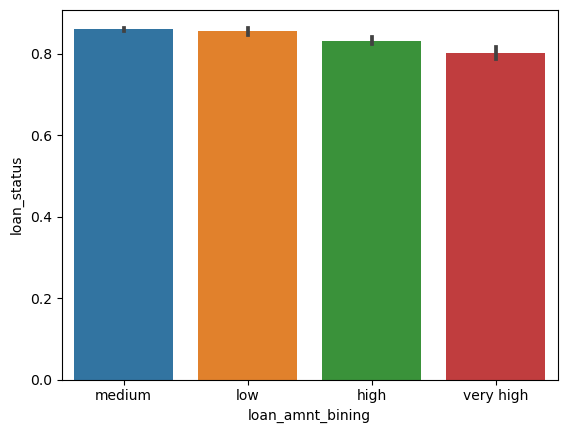

In [110]:
sns.barplot(x='loan_amnt_bining', y='loan_status', data=df)
plt.show()

In [111]:
#df['loan_amnt_bining'] = pd.to_numeric(df['loan_amnt_zakresy'],errors = 'coerce')

In [112]:
# Feature engineering, przykład
# Możemy tworzyć nowe kolumny wykorzystując dotychczasowe (dzieląc jedną przez drugą, mnożąc, podnosząc do potęgi, itd)
# all_data['my_feature'] = all_data['LotArea']/all_data['LotFrontage']

In [113]:
# Feature engineering, przykład
# Możemy wyciągać informacje które uznajemy za cenne z łańcuchów znaków
# data['full_name'][0] -> 'Mr Adam Smith'
# data['full_name'][1] -> 'Mrs Anna Hertz'
# Tworzymy nową kolumnę 'personal_title'
# data['personal_title'].unique() -> ['Mr', 'Mrs', 'Ms', '']
# data['personal_title'][0] -> 'Mr'
# data['personal_title'][1] -> 'Mrs'

In [114]:
# Feature enginnering, przykład
# 'bining', podzielenie zmiennej ciągłej na zakresy i przypisanie każdej etykiety
# Zmieńmy kontekst na projekt końcowy, zauważamy, że odsetek spłacanych pożyczek powyżej 400000 jest bardzo duży
# Możemy stworzyć nową kolumnę z 'flagą' mówiącą o tym czy pożyczka jest wysoka czy nie, model sprawdzi czy jest korzyść
# z traktowania tej grupy pożyczkobiorców osobno
# data['is_loan_high']: wartości -> 0,1

In [115]:
# 2

In [116]:
df['wnioskowal_dostal'] = df['loan_amnt']/df['funded_amnt']

In [117]:
df['wnioskowal_dostal']

0       1.000
1       1.000
2       1.000
3       1.000
4       1.000
         ... 
42531   1.000
42532   1.000
42533   1.000
42534   1.000
42535   1.000
Name: wnioskowal_dostal, Length: 42536, dtype: float64

In [118]:
# 3

In [119]:
df['wnioskowal_dostal_roznica'] = df['loan_amnt'] - df['funded_amnt']

In [120]:
df['wnioskowal_dostal_roznica'].value_counts()

0.000        40538
5000.000        16
7500.000        12
3625.000        11
8000.000        11
             ...  
12625.000        1
12800.000        1
10850.000        1
8250.000         1
11250.000        1
Name: wnioskowal_dostal_roznica, Length: 519, dtype: int64

In [121]:
# 4

In [122]:
df['loan_amnt'] = pd.to_numeric(df['loan_amnt'],errors = 'coerce')

In [123]:
df['dochod_kredyt'] = df['loan_amnt']/df['annual_inc']
df['dochod_kredyt']

0       0.208
1       0.083
2       0.196
3       0.203
4       0.037
         ... 
42531   0.019
42532   0.083
42533   0.023
42534   0.110
42535   0.071
Name: dochod_kredyt, Length: 42536, dtype: float64

In [124]:
# 5

In [125]:
df['dochod_rata'] = df['annual_inc']/df['installment']
df['dochod_rata']

0        147.357
1        501.421
2        145.286
3        145.000
4       1180.115
          ...   
42531   1587.442
42532    373.715
42533   1363.242
42534    288.030
42535    448.402
Name: dochod_rata, Length: 42536, dtype: float64

In [126]:
# 6

In [127]:
df['dochod_oprocentowanie'] = df['annual_inc']/df['int_rate']
df['dochod_oprocentowanie']

0        225352.113
1        196463.654
2         76766.917
3        364714.603
4        630417.652
            ...    
42531   1750972.763
42532    124481.328
42533   1178992.497
42534    704057.279
42535    903225.806
Name: dochod_oprocentowanie, Length: 42536, dtype: float64

In [128]:
# 7

In [129]:
#  dodanie kolumny z informacją, czy pożyczka jest konsolidacyjna, bądź nie 
#  (1 - tak, 0 - nie)

In [130]:
def konsolidacyjna(df):
    if (df['purpose'] == 'debt_consolidation'):
        return 1
    else:
        return 0

In [131]:
df['konsolidacyjna'] = df.apply(konsolidacyjna, axis=1)

In [132]:
df['konsolidacyjna'].value_counts()

0    22759
1    19777
Name: konsolidacyjna, dtype: int64

In [133]:
# 8

In [134]:
# dodanie kolumny z informacją, jaka jest spłacalność przy dyżych kredytach

In [135]:
def duzy_kredyt(df):
    if (df['loan_amnt'] > 25000) and (df['loan_status'] == 1):
        return 1
    else:
        return 0

In [136]:
df['duzy_kredyt'] = df.apply(duzy_kredyt, axis=1)

In [137]:
df['duzy_kredyt']

0        0
1        0
2        0
3        0
4        0
        ..
42531    0
42532    0
42533    0
42534    0
42535    0
Name: duzy_kredyt, Length: 42536, dtype: int64

In [138]:
# 9 dodaje kolumnę z ilością miesięcy, jaką dana osoba posiada jakieś kredyty

In [139]:
from datetime import datetime

today = datetime.today()
df['od_ilu_miesiecy_kredyt'] = ((today - pd.to_datetime(df['earliest_cr_line'])) /np.timedelta64(1, 'M'))

In [140]:
df['od_ilu_miesiecy_kredyt'].value_counts

<bound method IndexOpsMixin.value_counts of 0       455.192
1       284.248
2       253.200
3       322.196
4       323.214
          ...  
42531       NaN
42532       NaN
42533       NaN
42534       NaN
42535       NaN
Name: od_ilu_miesiecy_kredyt, Length: 42536, dtype: float64>

In [141]:
# 10 dodam kolumnę z informacją, czy żródło dochodu zostało zweryfikowane (1), bądź nie (0)

In [142]:
df['verification_status'].value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

In [143]:
def verification(df):
    if (df['verification_status'] == 'Source Verified'):
        return 1
    else:
        return 0

In [144]:
df['source_verified'] = df.apply(verification, axis=1)

In [145]:
df['source_verified']

0        0
1        1
2        0
3        1
4        1
        ..
42531    0
42532    0
42533    0
42534    0
42535    0
Name: source_verified, Length: 42536, dtype: int64

In [146]:
# 11 zmienną 'issue_d' wykorzystam do stworzenia kolumny z miesiącami, w których brane były pożyczki

In [147]:
df['issue_month'] = pd.Series(df.issue_d).str.replace(r'-\d+', '')

C:\Users\asus\AppData\Local\Temp\ipykernel_12244\34975850.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['issue_month'] = pd.Series(df.issue_d).str.replace(r'-\d+', '')


In [148]:
df['issue_month'].value_counts()

Dec    4685
Nov    4439
Oct    4181
Sep    3873
Aug    3729
Jul    3694
Jun    3494
May    3167
Apr    3067
Mar    3002
Jan    2616
Feb    2588
Name: issue_month, dtype: int64

In [149]:
# Widać, że najwięcej kredytów wzięto w grudniu.
# Porównam, czy spłacalność kredytów rózniła się w poszczególnych miesiącach

In [150]:
pd.pivot_table(df, index='loan_status', columns='issue_month', aggfunc="size")

issue_month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
loan_status,,,,,,,,,,,,
0,435,525,750,346,403,536,550,427,510,689,657,603
1,2632,3204,3935,2242,2213,3158,2944,2575,2657,3750,3524,3270


In [151]:
#tu def procentow

In [152]:
# 12 podzielę zmienną 'annual_inc' na zakresy wg dodchodu

In [153]:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc_bining'] = df['annual_inc'].apply(lambda x: annual_income(x))

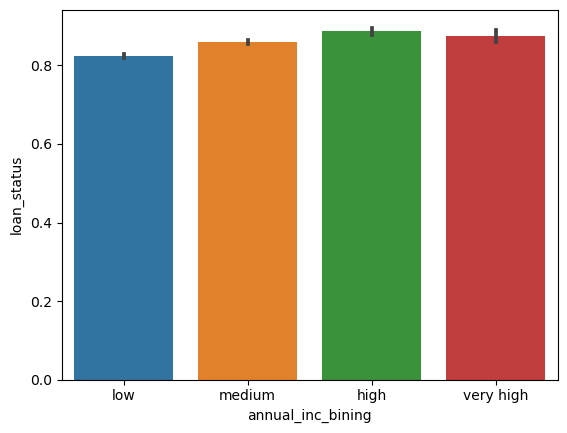

In [154]:
sns.barplot(x='annual_inc_bining', y='loan_status', data=df)
plt.show()

In [155]:
# 13 podzielę zmienną 'emp_length' na zakresy wg dodchodu

In [156]:
df['emp_length'].value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [157]:
def usuniecie_znakow(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')

In [158]:
usuniecie_znakow(df,'emp_length')

C:\Users\asus\AppData\Local\Temp\ipykernel_12244\1282640428.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


In [159]:
df['emp_length'].value_counts()

10    9369
0     5062
2     4743
3     4364
4     3649
1     3595
5     3458
6     2375
7     1875
8     1592
9     1341
Name: emp_length, dtype: int64

In [160]:
df['emp_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [161]:
df['emp_length'].fillna('10', inplace=True)

In [162]:
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce').convert_dtypes() 

In [163]:
df['emp_length'].dtype

Int64Dtype()

In [164]:
# podzielę zmienną 'emp_length' na zakresy wg dodchodu

In [165]:
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <= 3:
        return 'junior'
    elif n > 3 and n <= 7:
        return 'senior'
    else:
        return 'expert'

In [166]:
df['emp_length_bining'] = df['emp_length'].apply(lambda x: emp_length(x))

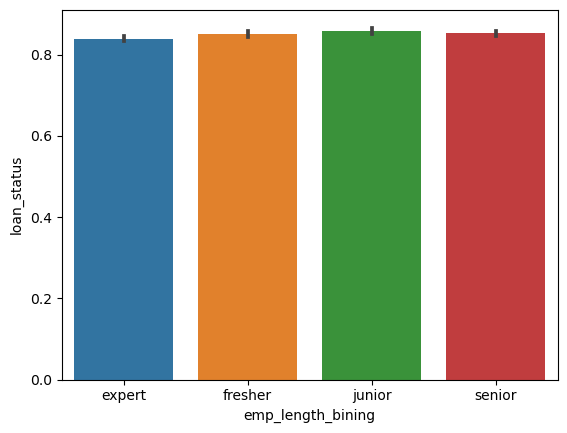

In [167]:
sns.barplot(x='emp_length_bining', y='loan_status', data=df)
plt.show()

In [168]:
# 14 podzielę zmienną 'inq_last_6mths' na zakresy wg ilości składanych wniosków kredytowych

In [169]:
df['inq_last_6mths'] = pd.to_numeric(df['inq_last_6mths'], errors='coerce').convert_dtypes() 

In [170]:
df['inq_last_6mths'].value_counts()

0     19657
1     11277
2      5987
3      3182
4      1056
5       596
6       339
7       182
8       115
9        50
10       24
11       15
12       15
15        9
14        6
13        6
18        4
16        3
17        2
24        2
19        2
32        1
33        1
31        1
28        1
25        1
27        1
20        1
Name: inq_last_6mths, dtype: Int64

In [171]:
def inq_last_6mths(n):
    if n <= 5:
        return 'malo'
    elif n > 5 and n <= 10:
        return 'srednio'
    elif n > 10 and n <= 15:
        return 'duzo'
    else:
        return 'bardzo duzo'

In [172]:
df['inq_last_6mths_bining'] = df['inq_last_6mths'].apply(lambda x: inq_last_6mths(x))

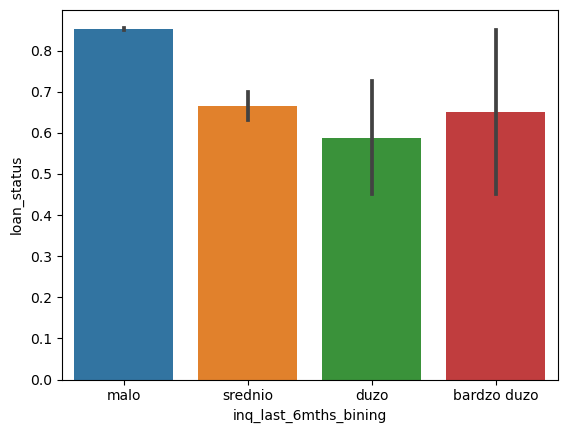

In [173]:
sns.barplot(x='inq_last_6mths_bining', y='loan_status', data=df)
plt.show()

In [174]:
# 15

In [175]:
df['installment'].value_counts()

311.110    68
180.960    59
311.020    54
150.800    48
368.450    46
           ..
809.530     1
48.930      1
405.460     1
458.350     1
204.840     1
Name: installment, Length: 16459, dtype: int64

In [176]:
df['dochod_raty_roznica'] = df['annual_inc'] - (df['installment'] * 12)

In [177]:
df['dochod_raty_roznica']

0        22045.560
1        29282.040
2        11240.040
3        45128.280
4        79186.520
           ...    
42531   178639.320
42532    11614.680
42533   109031.720
42534    56541.920
42535    68126.680
Name: dochod_raty_roznica, Length: 42536, dtype: float64

In [178]:
## 16 dodanie kolumny z informacją, czy pożyczkobiorca posiada kredyt hipoteczny, bądź nie (1 - tak, 0 - nie)

In [179]:
df['home_ownership'].value_counts()

RENT        20182
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [180]:
def hipoteka(df):
    if (df['home_ownership'] == 'MORTGAGE'):
        return 1
    else:
        return 0

In [181]:
df['hipoteka'] = df.apply(hipoteka, axis=1)

In [182]:
df['hipoteka'].value_counts()

0    23577
1    18959
Name: hipoteka, dtype: int64

In [183]:
# 17

In [184]:
df['fico'] = (df['fico_range_low'] + df['fico_range_high'])/2

In [185]:
df.drop(
['fico_range_low',
 'fico_range_high'],
axis=1, inplace=True)

In [186]:
df['fico'] = pd.to_numeric(df['fico'], errors='coerce').convert_dtypes() 

In [187]:
def fico(n):
    if n <= 700:
        return 'malo'
    elif n > 700 and n <= 750:
        return 'srednio'
    elif n > 750 and n <= 800:
        return 'duzo'
    else:
        return 'bardzo duzo'

In [188]:
df['fico_bining'] = df['fico'].apply(lambda x: fico(x))

In [189]:
df['fico_bining'].value_counts()

srednio        17872
malo           16678
duzo            7362
bardzo duzo      624
Name: fico_bining, dtype: int64

In [190]:
def niskie_fico(df):
    if (df['fico'] == 'malo') and (df['loan_status'] == 1):
        return 1
    else:
        return 0

In [191]:
df['niskie_fico'] = df.apply(niskie_fico, axis=1)

In [192]:
df['niskie_fico'].value_counts()

0    42536
Name: niskie_fico, dtype: int64

In [193]:
# 18 Podzielę 'int_rate' na przedziały

In [194]:
df['int_rate'].value_counts()

0.110    970
0.115    837
0.135    832
0.075    787
0.079    742
        ... 
0.175      1
0.215      1
0.244      1
0.168      1
0.162      1
Name: int_rate, Length: 394, dtype: int64

In [195]:
def int_rate(n):
    if n <= 0.1:
        return 'niskie'
    elif n > 0.1 and n <= 0.2:
        return 'srednie'
    else:
        return 'wysokie'

In [196]:
df['int_rate_bining'] = df['int_rate'].apply(lambda x: int_rate(x))

In [197]:
df['int_rate_bining'].value_counts()

srednie    29004
niskie     12593
wysokie      939
Name: int_rate_bining, dtype: int64

In [198]:
# Dodam kolumnę z informacją, jak przestawia się spłata kredytu przy wysokim oprocentowaniu

In [199]:
def procent(df):
    if (df['int_rate_bining'] == 'wysokie') and (df['loan_status'] == 1):
        return 1
    else:
        return 0

In [200]:
df['wysokie_oprocentowanie'] = df.apply(procent, axis=1)

In [201]:
df['wysokie_oprocentowanie'].value_counts()

0    41918
1      618
Name: wysokie_oprocentowanie, dtype: int64

In [202]:
# Log Transformation

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'term'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>],
       [<AxesSubplot:title={'center':'emp_length'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'loan_status'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'earliest_cr_line'}>],
       [<AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'pub_rec_bankruptcies'}>],
       [<AxesSubplot:title={'center':'wnioskowal_dostal'}>,
        <AxesSubplot:title={'center':'wnioskowal_dostal_roznica'}>,
        <AxesSubplot:title={'center':'dochod_kredyt'}>,
        <AxesSubp

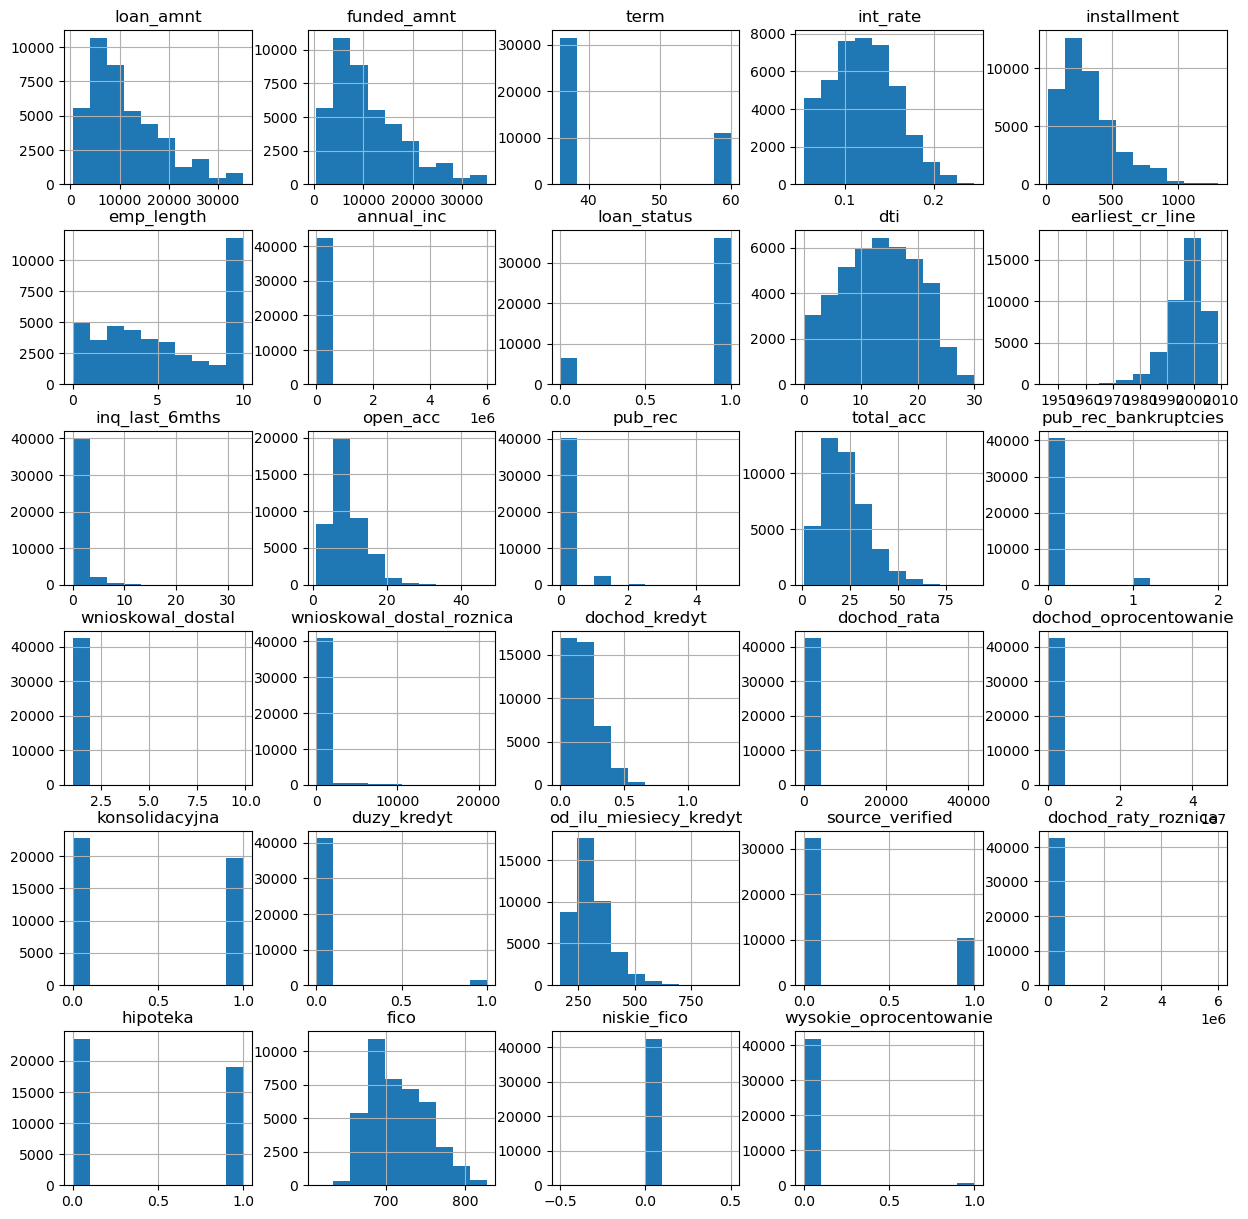

In [203]:
df.hist(figsize=(15,15))

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


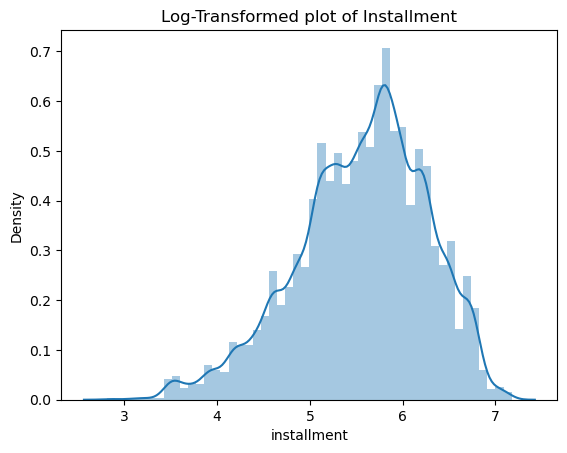

In [204]:
df['installment'] =  np.log1p(df['installment'])

sns.distplot(df['installment'])
plt.title("Log-Transformed plot of Installment")
plt.show()

In [205]:
# Polynomial features - bada interakcję między niezależnymi argumentami

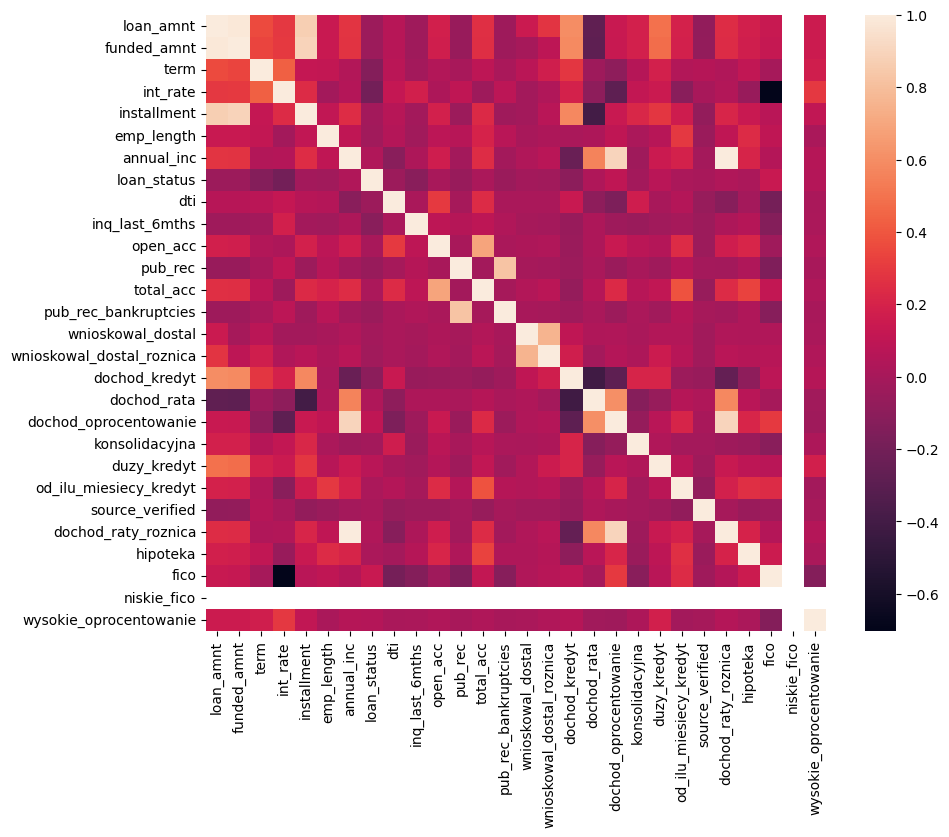

In [206]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr)
plt.show()

In [207]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
to_cross = ['dti', 'int_rate', 'fico']
crossed_features = poly.fit_transform(df[to_cross].values)

# Tworzę data frame i dodaję do danych
crossed_features = pd.DataFrame(crossed_features)
df = pd.concat([df, crossed_features], axis=1)

df.head().T

,0,1,2,3,4
loan_amnt,5000.000,2500.000,2400.000,10000.000,3000.000
funded_amnt,5000.000,2500.000,2400.000,10000.000,3000.000
term,36.000,60.000,36.000,36.000,60.000
int_rate,0.106,0.153,0.160,0.135,0.127
installment,5.099,4.108,4.447,5.830,4.231
grade,B,C,C,C,B
emp_length,10,0,10,10,1
home_ownership,RENT,RENT,RENT,RENT,RENT
annual_inc,24000.000,30000.000,12252.000,49200.000,80000.000
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified


In [ ]:
print "{:.0%}".format(1/3)

In [208]:
pd.pivot_table(df, index="loan_status", columns="grade", aggfunc="size")

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
0,610,1518,1504,1327,883,416,173
1,9573,10872,7236,4689,2511,885,339


In [223]:
pd.crosstab(df['loan_status'], df['grade']).pipe(lambda x: x / x.values.sum())

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
0,0.014,0.036,0.035,0.031,0.021,0.010,0.004
1,0.225,0.256,0.170,0.110,0.059,0.021,0.008


In [210]:
print("% osób spłacających pożyczki w poszczególnych grupach")
print(f"A: {round((9573)/(610+9573) * 100, 2)}%")
print(f"B: {round((10872)/(1518+10872) * 100, 2)}%")
print(f"C: {round((7236)/(1504+7236) * 100, 2)}%")
print(f"D: {round((4689)/(1327+4689) * 100, 2)}%")
print(f"E: {round((2511)/(883+2511) * 100, 2)}%")
print(f"F: {round((885)/(885+416)* 100, 2)}%")
print(f"G: {round((339)/(173+339)* 100, 2)}%")

% osób spłacających pożyczki w poszczególnych grupach
A: 94.01%
B: 87.75%
C: 82.79%
D: 77.94%
E: 73.98%
F: 68.02%
G: 66.21%


In [239]:
pd.crosstab(df['grade'], df['loan_status'], normalize='index')

loan_status,0,1
grade,,
A,0.060,0.940
B,0.123,0.877
C,0.172,0.828
D,0.221,0.779
E,0.260,0.740
F,0.320,0.680
G,0.338,0.662


In [233]:
ctdf = pd.crosstab(df['grade'], df['loan_status'])

In [234]:
ctdf

loan_status,0,1
grade,,
A,610,9573
B,1518,10872
C,1504,7236
D,1327,4689
E,883,2511
F,416,885
G,173,339


In [238]:
ctdf / ctdf.sum()

loan_status,0,1
grade,,
A,0.095,0.265
B,0.236,0.301
C,0.234,0.200
D,0.206,0.130
E,0.137,0.070
F,0.065,0.025
G,0.027,0.009


In [221]:
.agg(grade=(df['grade'], 'nunique'), perc=(df['loan_status'], lambda x: x.value_counts(normalize=True), ['0'])))

TypeError: Must provide 'func' or tuples of '(column, aggfunc).

In [235]:
df.groupby('grade', as_index=False).agg(ID=('grade', 'nunique'), 
                                          percent=('0', lambda x: x.value_counts(normalize=True)['loan_status']))

KeyError: "Column(s) ['0'] do not exist"

In [237]:
df.assign(type=df['loan_status'].eq('0')).groupby('grade').agg({'grade': 'nunique', 'loan_status': 'nunique'}) 

,grade,loan_status
grade,,
A,1,2
B,1,2
C,1,2
D,1,2
E,1,2
F,1,2
G,1,2
